In [20]:
import pandas as pd #importing the pandas package

In [21]:
import numpy as np #importing the numpy package

In [22]:
import matplotlib.pyplot as plt #importing the matplotlib package

In [23]:
import seaborn as sb #importing the seaborn package

In [24]:
%matplotlib inline

In [25]:
data = pd.read_csv("C:/Users/tanuj/Desktop/Subjects/DSP/Assignment5//crime.csv") #reading the dataset

In [26]:
data.head()

,Record ID,Agency Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [27]:
data.shape

(889, 24)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 24 columns):
Record ID                889 non-null int64
Agency Code              889 non-null object
Agency_Name              889 non-null object
Agency_Type              889 non-null object
City                     889 non-null object
State                    889 non-null object
Year                     889 non-null int64
Month                    889 non-null object
Incident                 889 non-null int64
Crime_Type               889 non-null object
Crime Solved             889 non-null object
Victim_Sex               889 non-null object
Victim Age               889 non-null int64
Victim Race              889 non-null object
Victim Ethnicity         889 non-null object
Perpetrator Sex          889 non-null object
Perpetrator Age          889 non-null int64
Perpetrator Race         889 non-null object
Perpetrator Ethnicity    889 non-null object
Relationship             889 non-null object


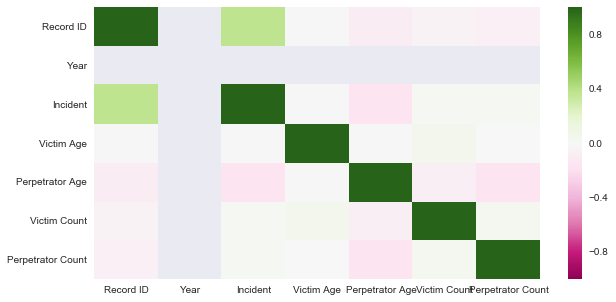

In [29]:
corr = data.corr()
plt.figure(figsize = (10,5))
sb.heatmap(corr,cmap="PiYG",
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)

In [30]:
data = (data.drop(['Record ID', 'Agency Code','Victim Ethnicity','Perpetrator Ethnicity',
                                 'Record Source'],axis=1))

In [31]:
Victim_Sex = data['Victim Sex'].values
Victim_Age = data['Victim Age'].values
#Victim_Age = Victim_Age.astype('int16')
Perpetrator_Sex = data['Perpetrator Sex'].values
Perpetrator_Age = data['Perpetrator Age'].values
#Perpetrator_Age = Perpetrator_Age.astype('int16')

KeyError: 'Victim Sex'

In [32]:
Relationship = data['Relationship'].values
Weapon = data['Weapon'].values
Solved = data['Crime Solved'].values
V_Race = data['Victim Race'].values
P_Race = data['Perpetrator Race'].values

In [33]:
Crime_Type = data['Crime Type'].values
Agency_Name = data['Agency Name'].values
Agency_Type = data['Agency Type'].values
P_Count =  data['Perpetrator Count'].values

KeyError: 'Crime Type'

In [17]:
City =  data['City'].values
State =  data['State'].values
Year =  data['Year'].values
Month =  data['Month'].values
Rel_Category = data['Relationship'].values
W_Category = data['Weapon'].values

In [18]:
homicide = pd.DataFrame(np.column_stack((Victim_Sex,Victim_Age,Perpetrator_Sex,Perpetrator_Age,
                    Relationship,Weapon,Solved,V_Race,P_Race,Crime_Type,Agency_Name,Agency_Type,
                    Rel_Category,P_Count,City,State,Year,Month,W_Category)))
homicide.columns = ['Victim_Sex','Victim_Age','Perpetrator_Sex','Perpetrator_Age','Relationship',
                    'Weapon','Solved','V_Race','P_Race','Crime_Type','Agency_Name','Agency_Type',
                    'Rel_Category','P_Count','City','State','Year','Month','W_Category']


NameError: name 'Victim_Sex' is not defined

In [19]:
homicide.head()

NameError: name 'homicide' is not defined

In [56]:
select_cols = ["Victim_Sex","Victim_Age","Perpetrator_Age","Relationship","Weapon","V_Race","P_Race","Crime_Type","Agency_Type","State","W_Category"]

In [58]:
x = homicide[select_cols]

In [60]:
y = homicide.Solved

In [61]:
from sklearn.model_selection import train_test_split  #Importing the train and test function

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=36,stratify=y)